In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['bmh','science','notebook','grid'])

In [4]:
# loading all packages
imp_30hz = np.load('J:/Universidade/GIECAR/Data/impedance_30hz.npy')
imp_background = np.load('J:/Universidade/GIECAR/Data/impedance_background.npy')
inverted_impedance_final_butter = np.load('J:/Universidade/GIECAR/Data/inverted_impedance_butter.npy')
inverted_impedance_final_ricker = np.load('J:/Universidade/GIECAR/Data/inverted_impedance_ricker.npy')
residuo_ricker = np.load('J:/Universidade/GIECAR/Data/residuo_ricker.npy')
residuo_butter = np.load('J:/Universidade/GIECAR/Data/residuo_butter.npy')


Colors

In [80]:
PRIMARY = "royalblue"
SECONDARY = "forestgreen"
TERCIARY = "firebrick"
ALTERNATIVE = "darkorange"
TEXT_COLOR = '#212121'
plt.rc('font', family='Arial')

In [81]:
ricker_inv = inverted_impedance_final_ricker
butter_inv = inverted_impedance_final_butter

nx, ny, nz = imp_30hz.shape

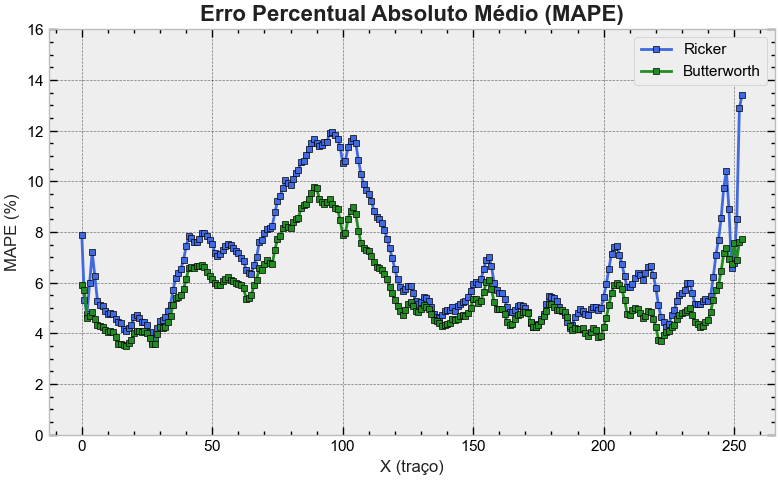

In [108]:
MAPE_r = np.zeros(nx)
MAPE_b = np.zeros(nx)


for ix in range(nx):
    MAPE_r[ix] = np.mean(np.abs( (ricker_inv[ix,128,:] - imp_30hz[ix,128,:]) / imp_30hz[ix,128,:] )) *100
    MAPE_b[ix] = np.mean(np.abs( (butter_inv[ix,128,:] - imp_30hz[ix,128,:]) / imp_30hz[ix,128,:] )) *100

MAPE_b = np.delete(MAPE_b, slice(0, 2))
MAPE_r = np.delete(MAPE_r, slice(0, 2))

plt.figure(figsize=(8, 5))
plt.plot(MAPE_r, 's-', label='Ricker', ms=5,
         color=PRIMARY, markeredgecolor='black', markeredgewidth=0.5)

plt.plot(MAPE_b, 's-', label='Butterworth', ms=5,
         color=SECONDARY, markeredgecolor='black', markeredgewidth=0.5)

plt.title('Erro Percentual Absoluto Médio (MAPE)', fontsize=16, fontweight='bold', color=TEXT_COLOR)
plt.xlabel('X (traço)', fontsize=12, color=TEXT_COLOR)
plt.ylabel('MAPE (%)', fontsize=12, color=TEXT_COLOR)
plt.tick_params(axis='both', labelsize=11)
plt.legend(loc='upper right', fontsize=11)
plt.ylim(0, 16)


plt.tight_layout()
plt.savefig('simposio_figs/mape.png', dpi=300, bbox_inches='tight')
plt.show()
# regiao de falha o erro é maior

In [117]:
xxx = np.arange(0,254,1)

In [83]:
MAPE_b = np.delete(MAPE_b, slice(0, 2))
MAPE_r = np.delete(MAPE_r, slice(0, 2))

In [84]:
print(f"A média do MAPE de Ricker é: {np.mean(MAPE_r):.2f}%")
print(f"A média do MAPE de Butterworth é: {np.mean(MAPE_b):.2f}%")

A média do MAPE de Ricker é: 6.67%
A média do MAPE de Butterworth é: 5.58%


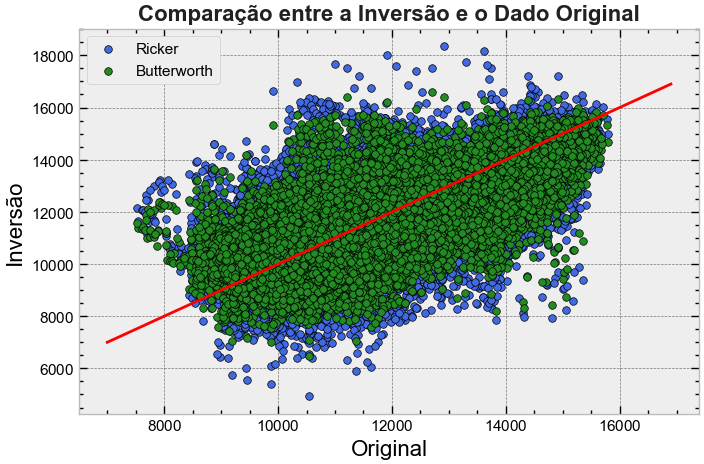

In [105]:
# iterar sobre o primeiro :, que é o x, x,y,z
x = np.arange(7000, 17000, 100)

plt.figure(figsize=(8, 5))

plt.scatter(imp_30hz[:,128,:].T,
            inverted_impedance_final_ricker[:,128,:].T,
            s=30,
            color=PRIMARY,
            label='Ricker',
            edgecolors='black',
            linewidth=0.5)
plt.scatter(imp_30hz[:,128,:].T,
            inverted_impedance_final_butter[:,128,:].T,
            s=30,
            label='Butterworth',
            color=SECONDARY,
            edgecolors='black',
            linewidth=0.5)

plt.title("Comparação entre a Inversão e o Dado Original", fontsize=16, fontweight='bold', color=TEXT_COLOR)
plt.ylabel('Inversão')
plt.xlabel('Original')
plt.plot(x,x, color="red")
plt.tick_params(axis='both', labelsize=11)
plt.legend(loc='upper left', fontsize=11)
plt.savefig('simposio_figs/inversaoxoriginal.png', dpi=300, bbox_inches='tight')
plt.show()
# abaixo da reta subestimando os valores de impedancia
# acima da reta superestimando os valores de impedancia

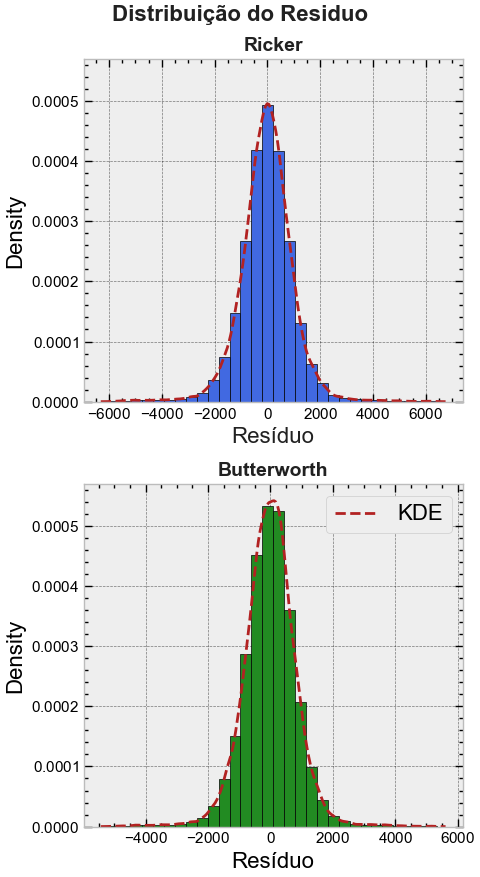

In [104]:
from tkinter import font
import seaborn as sns

# plt.figure(figsize=(6,5))
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(5, 9))

# Flatten the 3D array to 1D
residuo_flat_ricker = residuo_ricker[128,:,:].flatten()
residuo_flat_butter = residuo_butter[128,:,:].flatten()

# Create a histogram for ricker
axs[0].hist(residuo_flat_ricker,
         bins=30,
         density=True,
         edgecolor='black',
         color=PRIMARY)
axs[0].tick_params(axis='both', labelsize=11)
axs[0].set_title('Ricker', fontsize=14, fontweight='bold', color=TEXT_COLOR	)
axs[0].set_xlabel('Resíduo',color=TEXT_COLOR)

# Create a KDE plot for ricker
sns.kdeplot(residuo_flat_ricker,
            color=TERCIARY,
            linewidth=2,
            linestyle='--',
            label='KDE',
            ax=axs[0])  # Pass the second subplot axes

# Create a histogram for butter
axs[1].hist(residuo_flat_butter,
         bins=30,
         density=True,
         edgecolor='black',
         color=SECONDARY)
axs[1].set_title('Butterworth', fontsize=14, fontweight='bold', color=TEXT_COLOR)
axs[1].tick_params(axis='both', labelsize=11)
axs[1].set_xlabel('Resíduo')

# Create a KDE plot for butter
sns.kdeplot(residuo_flat_butter,
            color=TERCIARY,
            linewidth=2,
            linestyle='--',
            label='KDE',
            ax=axs[1])


plt.suptitle('Distribuição do Residuo', fontsize=16, fontweight='bold', color=TEXT_COLOR)

plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.savefig('simposio_figs/distribuicao_residuo.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
## CORRELAÇÃO DE PEARSON

pearson_residuo = np.corrcoef(residuo_flat_ricker, residuo_flat_butter)[0, 1]
pearson_original_ricker = np.corrcoef(imp_30hz[128,:,:].flatten(),
                                      inverted_impedance_final_ricker[128,:,:].flatten())[0, 1]
pearson_original_butter = np.corrcoef(imp_30hz[128,:,:].flatten(),
                                      inverted_impedance_final_butter[128,:,:].flatten())[0, 1]
pearson_ricker_butter = np.corrcoef(inverted_impedance_final_ricker[128,:,:].flatten(),
                                    inverted_impedance_final_butter[128,:,:].flatten())[0, 1]

print(f"A correlação de Pearson entre os resíduos é: {pearson_residuo:.2f}")
print(f"A correlação de Pearson entre o original e a inversão de Ricker é: {pearson_original_ricker:.2f}")
print(f"A correlação de Pearson entre o original e a inversão de Butterworth é: {pearson_original_butter:.2f}")
print(f"A correlação de Pearson entre as inversões de Ricker e Butterworth é: {pearson_ricker_butter:.2f}")
# Um valor próximo de 1 implica em uma correlação positiva perfeita. Um valor próximo de -1 implica uma
# correlação negativa perfeita

A correlação de Pearson entre os resíduos é: 0.97
A correlação de Pearson entre o original e a inversão de Ricker é: 0.68
A correlação de Pearson entre o original e a inversão de Butterworth é: 0.75
A correlação de Pearson entre as inversões de Ricker e Butterworth é: 0.98
